In [22]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import (BaggingRegressor, RandomForestRegressor, AdaBoostRegressor)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Reading in the data
housing_df = pd.read_csv("combined_data_clean.csv")
housing_df.head()

,id,Price,Address,zip,status,mls,Subdivision,Year Built,Bedrooms,Bathrooms,Approx SQFT,CrimeRate
0,1,427167,3231 W MARYLAND AVE,85017,Active,6395749,WEST PLAZA 6 LOT 614-787,1958,3,2.0,1302.0,4.1
1,2,400000,5109 E THOMAS RD,85018,Active,6243667,PAPAGO VILLAGE,1943,0,0.0,1358.0,2.2
2,3,399900,8020 W STELLA AVE,85303,Active,6384821,SHALIMAR,1997,3,2.0,1505.0,0.0
3,4,349000,6944 W Verde LN,85033,Active,6395738,MARYVALE TERRACE NO. 49,1983,3,3.0,1514.0,3.0
4,5,419000,4105 W PASADENA AVE,85019,Active,6395732,TU-DOR ESTATES,1971,4,2.0,1908.0,2.5


In [3]:
# Check datatypes and make conversions if necessary
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           2265 non-null   int64  
 1   Price        2265 non-null   int64  
 2   Address      2265 non-null   object 
 3   zip          2265 non-null   int64  
 4   status       2265 non-null   object 
 5   mls          2265 non-null   int64  
 6   Subdivision  2261 non-null   object 
 7   Year Built   2265 non-null   int64  
 8   Bedrooms     2265 non-null   int64  
 9   Bathrooms    2265 non-null   float64
 10  Approx SQFT  2265 non-null   float64
 11  CrimeRate    2205 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 212.5+ KB


In [4]:
# Interpolation
housing_df1 = housing_df.fillna(2.5)

In [5]:
# Checking the data again
housing_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           2265 non-null   int64  
 1   Price        2265 non-null   int64  
 2   Address      2265 non-null   object 
 3   zip          2265 non-null   int64  
 4   status       2265 non-null   object 
 5   mls          2265 non-null   int64  
 6   Subdivision  2265 non-null   object 
 7   Year Built   2265 non-null   int64  
 8   Bedrooms     2265 non-null   int64  
 9   Bathrooms    2265 non-null   float64
 10  Approx SQFT  2265 non-null   float64
 11  CrimeRate    2265 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 212.5+ KB


In [6]:
education_df = pd.read_csv("education_by_zip.csv")
education_df.head()
education_df.rename(columns={'Zip':'zip'},inplace=True)
education_df.head()

,zip,Elem_School_District,Hightest_Rated_School
0,85003,Phoenix Elementary,94.44
1,85004,Phoenix Elementary,94.44
2,85006,Phoenix Elementary,94.44
3,85007,Phoenix Elementary,94.44
4,85008,Balsz,81.79


In [7]:
housing_df1.drop_duplicates()

,id,Price,Address,zip,status,mls,Subdivision,Year Built,Bedrooms,Bathrooms,Approx SQFT,CrimeRate
0,1,427167,3231 W MARYLAND AVE,85017,Active,6395749,WEST PLAZA 6 LOT 614-787,1958,3,2.0,1302.0,4.1
1,2,400000,5109 E THOMAS RD,85018,Active,6243667,PAPAGO VILLAGE,1943,0,0.0,1358.0,2.2
2,3,399900,8020 W STELLA AVE,85303,Active,6384821,SHALIMAR,1997,3,2.0,1505.0,0.0
3,4,349000,6944 W Verde LN,85033,Active,6395738,MARYVALE TERRACE NO. 49,1983,3,3.0,1514.0,3.0
4,5,419000,4105 W PASADENA AVE,85019,Active,6395732,TU-DOR ESTATES,1971,4,2.0,1908.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...
2260,2311,600000,3402 E CAROL ANN WAY,85032,Closed,6368329,BELLA TERRA,1981,3,2.0,2012.0,3.2
2261,2312,375000,739 E Constance WAY,85042,Closed,6358973,VILLAGES AT VERONA,2016,3,2.5,1499.0,2.9
2262,2313,365000,7301 W CHERYL DR,85345,Closed,6365681,SUNTOWN UNIT 2,1972,3,2.0,1581.0,0.0
2263,2314,529000,4637 E GRANADA RD,85008,Closed,6354718,RANCHO MIO,1953,3,2.0,1710.0,4.5


In [8]:
merged_df=housing_df1.merge(education_df, how='left', on='zip')
merged_df

,id,Price,Address,zip,status,mls,Subdivision,Year Built,Bedrooms,Bathrooms,Approx SQFT,CrimeRate,Elem_School_District,Hightest_Rated_School
0,1,427167,3231 W MARYLAND AVE,85017,Active,6395749,WEST PLAZA 6 LOT 614-787,1958,3,2.0,1302.0,4.1,Alhambra,100.04
1,2,400000,5109 E THOMAS RD,85018,Active,6243667,PAPAGO VILLAGE,1943,0,0.0,1358.0,2.2,Creighton,75.80
2,3,399900,8020 W STELLA AVE,85303,Active,6384821,SHALIMAR,1997,3,2.0,1505.0,0.0,Cartwright,95.89
3,4,349000,6944 W Verde LN,85033,Active,6395738,MARYVALE TERRACE NO. 49,1983,3,3.0,1514.0,3.0,Cartwright,95.89
4,5,419000,4105 W PASADENA AVE,85019,Active,6395732,TU-DOR ESTATES,1971,4,2.0,1908.0,2.5,Alhambra,100.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,2311,600000,3402 E CAROL ANN WAY,85032,Closed,6368329,BELLA TERRA,1981,3,2.0,2012.0,3.2,Paradise Valley Unified,99.97
2261,2312,375000,739 E Constance WAY,85042,Closed,6358973,VILLAGES AT VERONA,2016,3,2.5,1499.0,2.9,Roosevelt,76.54
2262,2313,365000,7301 W CHERYL DR,85345,Closed,6365681,SUNTOWN UNIT 2,1972,3,2.0,1581.0,0.0,Pendergast,85.28
2263,2314,529000,4637 E GRANADA RD,85008,Closed,6354718,RANCHO MIO,1953,3,2.0,1710.0,4.5,Balsz,81.79


In [9]:
new_housing_df=merged_df.drop(columns=['mls','Address','id','Subdivision','status','Elem_School_District', 'Bedrooms', 'Bathrooms'],axis=1)
new_housing_df

,Price,zip,Year Built,Approx SQFT,CrimeRate,Hightest_Rated_School
0,427167,85017,1958,1302.0,4.1,100.04
1,400000,85018,1943,1358.0,2.2,75.80
2,399900,85303,1997,1505.0,0.0,95.89
3,349000,85033,1983,1514.0,3.0,95.89
4,419000,85019,1971,1908.0,2.5,100.04
...,...,...,...,...,...,...
2260,600000,85032,1981,2012.0,3.2,99.97
2261,375000,85042,2016,1499.0,2.9,76.54
2262,365000,85345,1972,1581.0,0.0,85.28
2263,529000,85008,1953,1710.0,4.5,81.79


In [10]:
# Set the random seed, number of estimators
# and the "step factor" used to plot the graph of MSE
# for each method
random_state = 42
n_jobs = 1  # Parallelisation factor for bagging, random forests
n_estimators = 1000
step_factor = 10
axis_step = int(n_estimators/step_factor)

In [11]:
# Split our preprocessed data into our features and target arrays
y = new_housing_df["Price"].values
X = new_housing_df.drop(["Price"],axis=1).values

X

array([[8.5017e+04, 1.9580e+03, 1.3020e+03, 4.1000e+00, 1.0004e+02],
       [8.5018e+04, 1.9430e+03, 1.3580e+03, 2.2000e+00, 7.5800e+01],
       [8.5303e+04, 1.9970e+03, 1.5050e+03, 0.0000e+00, 9.5890e+01],
       ...,
       [8.5345e+04, 1.9720e+03, 1.5810e+03, 0.0000e+00, 8.5280e+01],
       [8.5008e+04, 1.9530e+03, 1.7100e+03, 4.5000e+00, 8.1790e+01],
       [8.5009e+04, 1.9530e+03, 1.1450e+03, 4.0000e+00, 6.5700e+01]])

In [12]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [13]:
# Pre-create the arrays which will contain the MSE for
# each particular ensemble method
estimators = np.zeros(axis_step)
bagging_mse = np.zeros(axis_step)
rf_mse = np.zeros(axis_step)
boosting_mse = np.zeros(axis_step)

In [18]:
# Estimate the Bagging MSE over the full number
# of estimators, across a step size ("step_factor")
for i in range(0, axis_step):
    print("Bagging Estimator: %d of %d..." % (
        step_factor*(i+1), n_estimators)
    )
    bagging = BaggingRegressor(
        DecisionTreeRegressor(), 
        n_estimators=step_factor*(i+1),
        n_jobs=n_jobs,
        random_state=random_state
    )
    bagging.fit(X_train, y_train)
    mse = mean_squared_error(y_test, bagging.predict(X_test))
    estimators[i] = step_factor*(i+1)
    bagging_mse[i] = mse

Bagging Estimator: 10 of 1000...
Bagging Estimator: 20 of 1000...
Bagging Estimator: 30 of 1000...
Bagging Estimator: 40 of 1000...
Bagging Estimator: 50 of 1000...
Bagging Estimator: 60 of 1000...
Bagging Estimator: 70 of 1000...
Bagging Estimator: 80 of 1000...
Bagging Estimator: 90 of 1000...
Bagging Estimator: 100 of 1000...
Bagging Estimator: 110 of 1000...
Bagging Estimator: 120 of 1000...
Bagging Estimator: 130 of 1000...
Bagging Estimator: 140 of 1000...
Bagging Estimator: 150 of 1000...
Bagging Estimator: 160 of 1000...
Bagging Estimator: 170 of 1000...
Bagging Estimator: 180 of 1000...
Bagging Estimator: 190 of 1000...
Bagging Estimator: 200 of 1000...
Bagging Estimator: 210 of 1000...
Bagging Estimator: 220 of 1000...
Bagging Estimator: 230 of 1000...
Bagging Estimator: 240 of 1000...
Bagging Estimator: 250 of 1000...
Bagging Estimator: 260 of 1000...
Bagging Estimator: 270 of 1000...
Bagging Estimator: 280 of 1000...
Bagging Estimator: 290 of 1000...
Bagging Estimator: 300 

In [19]:
# Estimate the Random Forest MSE over the full number
# of estimators, across a step size ("step_factor")
for i in range(0, axis_step):
    print("Random Forest Estimator: %d of %d..." % (
        step_factor*(i+1), n_estimators)
    )
    rf = RandomForestRegressor(
        n_estimators=step_factor*(i+1),
        n_jobs=n_jobs,
        random_state=random_state
    )
    rf.fit(X_train, y_train)
    mse = mean_squared_error(y_test, rf.predict(X_test))
    estimators[i] = step_factor*(i+1)
    rf_mse[i] = mse

Random Forest Estimator: 10 of 1000...
Random Forest Estimator: 20 of 1000...
Random Forest Estimator: 30 of 1000...
Random Forest Estimator: 40 of 1000...
Random Forest Estimator: 50 of 1000...
Random Forest Estimator: 60 of 1000...
Random Forest Estimator: 70 of 1000...
Random Forest Estimator: 80 of 1000...
Random Forest Estimator: 90 of 1000...
Random Forest Estimator: 100 of 1000...
Random Forest Estimator: 110 of 1000...
Random Forest Estimator: 120 of 1000...
Random Forest Estimator: 130 of 1000...
Random Forest Estimator: 140 of 1000...
Random Forest Estimator: 150 of 1000...
Random Forest Estimator: 160 of 1000...
Random Forest Estimator: 170 of 1000...
Random Forest Estimator: 180 of 1000...
Random Forest Estimator: 190 of 1000...
Random Forest Estimator: 200 of 1000...
Random Forest Estimator: 210 of 1000...
Random Forest Estimator: 220 of 1000...
Random Forest Estimator: 230 of 1000...
Random Forest Estimator: 240 of 1000...
Random Forest Estimator: 250 of 1000...
Random Fo

In [20]:
# Estimate the AdaBoost MSE over the full number
# of estimators, across a step size ("step_factor")
for i in range(0, axis_step):
    print("Boosting Estimator: %d of %d..." % (
        step_factor*(i+1), n_estimators)
    )
    boosting = AdaBoostRegressor(
        DecisionTreeRegressor(),
        n_estimators=step_factor*(i+1),
        random_state=random_state,
        learning_rate=0.01
    )
    boosting.fit(X_train, y_train)
    mse = mean_squared_error(y_test, boosting.predict(X_test))
    estimators[i] = step_factor*(i+1)
    boosting_mse[i] = mse

Boosting Estimator: 10 of 1000...
Boosting Estimator: 20 of 1000...
Boosting Estimator: 30 of 1000...
Boosting Estimator: 40 of 1000...
Boosting Estimator: 50 of 1000...
Boosting Estimator: 60 of 1000...
Boosting Estimator: 70 of 1000...
Boosting Estimator: 80 of 1000...
Boosting Estimator: 90 of 1000...
Boosting Estimator: 100 of 1000...
Boosting Estimator: 110 of 1000...
Boosting Estimator: 120 of 1000...
Boosting Estimator: 130 of 1000...
Boosting Estimator: 140 of 1000...
Boosting Estimator: 150 of 1000...
Boosting Estimator: 160 of 1000...
Boosting Estimator: 170 of 1000...
Boosting Estimator: 180 of 1000...
Boosting Estimator: 190 of 1000...
Boosting Estimator: 200 of 1000...
Boosting Estimator: 210 of 1000...
Boosting Estimator: 220 of 1000...
Boosting Estimator: 230 of 1000...
Boosting Estimator: 240 of 1000...
Boosting Estimator: 250 of 1000...
Boosting Estimator: 260 of 1000...
Boosting Estimator: 270 of 1000...
Boosting Estimator: 280 of 1000...
Boosting Estimator: 290 of 10

C:\Users\jpndu\AppData\Local\Temp\ipykernel_32912\2339320589.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(estimators, bagging_mse, 'b-', color="black", label='Bagging')
C:\Users\jpndu\AppData\Local\Temp\ipykernel_32912\2339320589.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(estimators, rf_mse, 'b-', color="blue", label='Random Forest')
C:\Users\jpndu\AppData\Local\Temp\ipykernel_32912\2339320589.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(estimators, boosting_mse, 'b-', color="red", label='AdaBoost')


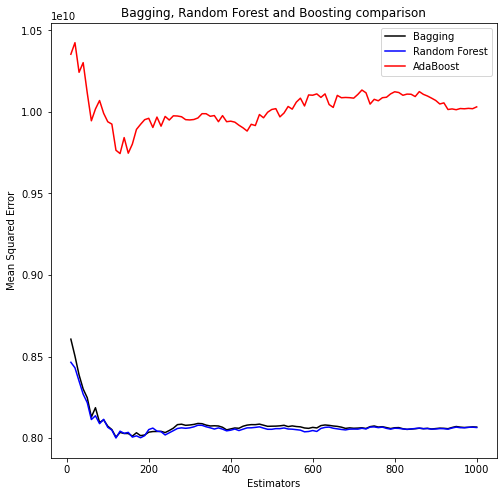

In [23]:
# Plot the chart of MSE versus number of estimators
plt.figure(figsize=(8, 8))
plt.title('Bagging, Random Forest and Boosting comparison')
plt.plot(estimators, bagging_mse, 'b-', color="black", label='Bagging')
plt.plot(estimators, rf_mse, 'b-', color="blue", label='Random Forest')
plt.plot(estimators, boosting_mse, 'b-', color="red", label='AdaBoost')
plt.legend(loc='upper right')
plt.xlabel('Estimators')
plt.ylabel('Mean Squared Error')
plt.show()

In [25]:
print(f'RandomForestRegressor Training Score: {rf.score(X_train, y_train)}')
print(f'RandomForestRegressor Testing Score: {rf.score(X_test, y_test)}')

print(f'Boosting Training Score: {boosting.score(X_train, y_train)}')
print(f'Boosting Testing Score: {boosting.score(X_test, y_test)}')

print(f'Bagging Training Score: {bagging.score(X_train, y_train)}')
print(f'Bagging Testing Score: {bagging.score(X_test, y_test)}')

RandomForestRegressor Training Score: 0.9616992043924283
RandomForestRegressor Testing Score: 0.7251580804972833
Boosting Training Score: 0.9991757018568009
Boosting Testing Score: 0.658172974546591
Bagging Training Score: 0.9616422679111984
Bagging Testing Score: 0.7250691601071106


In [14]:
predicted=clf.predict(X_test)
predicted

array([469917.66903143, 463755.77145619, 449131.02781333, 778932.57156257,
       339072.47168   , 680721.55128   , 516989.76912   , 625418.73674   ,
       347466.71393524, 334361.97155   , 462403.04133905, 452733.739     ,
       455030.41998   , 335926.70434   , 617368.49243714, 500035.09716952,
       543669.06539714, 682502.49137778, 330612.18655333, 602493.28706   ,
       892382.1553    , 526116.30146333, 482716.71785714, 431890.58923333,
       772731.90462   , 347553.72897619, 824539.5613    , 529847.4603    ,
       401525.65320903, 671573.62147111, 380352.96691587, 829252.65734667,
       365133.08706095, 390631.67004   , 530204.04116   , 579854.81305333,
       313248.1067    , 342954.21541333, 378300.95033143, 472709.28572   ,
       541611.62788762, 705916.88434   , 634145.55508   , 382503.66968667,
       831724.6203454 , 362035.45176667, 358500.85922095, 399100.55966   ,
       490702.24326   , 374604.69306857, 292028.64848667, 333675.80201714,
       473338.83665429, 4

In [15]:
comparison_df=pd.DataFrame(
{'actual':y_test,
 'predicted': predicted
})
comparison_df


,actual,predicted
0,475900,469917.669031
1,440000,463755.771456
2,440000,449131.027813
3,780000,778932.571563
4,285000,339072.471680
...,...,...
562,500000,453003.815440
563,375000,371990.472033
564,400000,438671.184390
565,340000,343025.063400


In [16]:
pd.DataFrame(X_test)

,0,1,2,3,4
0,85032.0,1972.0,1380.0,3.2,99.97
1,85041.0,2013.0,1681.0,4.5,76.54
2,85303.0,2002.0,1866.0,0.0,95.89
3,85020.0,1993.0,2517.0,2.1,97.13
4,85041.0,1949.0,1288.0,4.5,76.54
...,...,...,...,...,...
562,85006.0,1939.0,942.0,1.9,94.44
563,85043.0,1976.0,1192.0,3.2,76.86
564,85032.0,1974.0,1144.0,3.2,99.97
565,85033.0,2000.0,919.0,3.0,95.89


In [19]:
to_predict = [[85032.0, 2021, 3380.0, 4.0, 99.97]]

In [20]:
clf.predict(to_predict)

array([883487.65219787])

In [31]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': 10000,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 78,
 'verbose': 0,
 'warm_start': False}
